# Canvas Mouse Events

While I haven't yet added support for drawing fancy lines, I did include support for responding to mouse events: motion, clicks, and drags.  In the next few cells I'll use a few built-in IPython widgets to demonstrate how easy it is to work with mouse events with my new Canvas Widget.

But first I want to load my two test images and display them the old-fashioned way using Matplotlib.

In [1]:
from __future__ import print_function, unicode_literals, division, absolute_import

## Load image data

Boot: widget_canvas.js


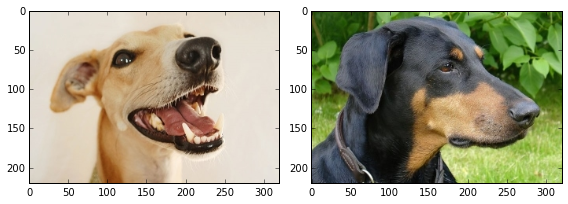

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import IPython
from IPython.html.widgets import HTMLWidget, LatexWidget, TextareaWidget, ContainerWidget

import widget_canvas as canvas

# Load two images.
data_A = canvas.image.read('images/Whippet.jpg')
data_B = canvas.image.read('images/Doberman.jpg')

# Quick display via Matplotlib.
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6))

ax1.imshow(data_A)
ax2.imshow(data_B)

plt.tight_layout()

## Simple Example

In [3]:
# Make a CanvasWidget.
wid = canvas.CanvasImageFancy(data_A)

# Generic event handler.
def simple_handler(widget, event):
    print(event)
    
    


In [4]:
wid.on_mouse(simple_handler)

In [5]:
wid

---

## Let's make some widgets

I want to display one of the images above using canvas image widget with a few additional helper widgets so I can see what's happening as I capture mouse events.  The setup process for connecting multiple widgets seems a little "wordy" to me, but this is also the first time I attempt to work with so many at the same time.  Maybe this is normal?  If there exists a better, more effective process I would to hear some feedback.

In the cell below I create a mouse-event display system to work alongside an instance of a my Canvas Widget.  The display is made from combinations of several `HTMLWidgets`, a single `TextareaWidget`, and a few `ContainerWidgets` to arrange them all in a nice layout.

In [ ]:
# Image widget.
wid_image = canvas.CanvasImageBase(data_A)
wid_image.set_css({'border': 'solid black 1px'})

# Mouse X & Y canvas coordinates.
wid_move_XY = HTMLWidget(value='XY:')
wid_move_XY.set_css({'width': '250px', 'margin-left': '10px', 'font-family': 'monospace'})

wid_drag_XY = HTMLWidget(value='XY:')
wid_drag_XY.set_css({'width': '250px', 'margin-left': '10px', 'font-family': 'monospace'})

# Status indicators.
wid_move = HTMLWidget(value='Move')
wid_move.set_css({'width': '35px'})

wid_drag = HTMLWidget(value='Drag')
wid_drag.set_css({'width': '35px'})

wid_down_up = HTMLWidget(value='Button: Up')
wid_down_up.set_css({'width': '100px'})

wid_click = HTMLWidget(value='Click')

wid_scroll = HTMLWidget(value='Scroll')

# Event information.
wid_event_text = TextareaWidget()
wid_event_text.set_css({'width': '500', 'height': '130', 'font-family': 'monospace'})

# Assemble containers.
container_move = ContainerWidget(children=[wid_move, wid_move_XY])
container_drag = ContainerWidget(children=[wid_drag, wid_drag_XY])

container_info = ContainerWidget(children=[container_move, container_drag, wid_down_up, wid_click, 
                                           wid_scroll, wid_event_text])
container_info.set_css({'margin-left': '10px'})

container_main = ContainerWidget(children=[wid_image, container_info])

The `container_main` widget is an instance of `ContainerWidget` and it holds all of the widgets comprising my display system, including the `ImageWidget` instance stored in `wid_image`.

## Python event handlers

Define a few Python event handlers and connect them to the canvas widget so they can update the display in response to mouse events.

In [ ]:
# http://getbootstrap.com/components/#labels
style_A = 'label label-default'
style_B = 'label label-primary'
style_C = 'label label-success'
style_D = 'label label-info'
style_E = 'label label-warning'
style_F = 'label label-danger'

# Handlers.
def handle_event(widget, ev):
    """Generic event handler."""
    wid_event_text.value = 'Event:\n{}'.format(ev)

def handle_motion(widget, ev):
    wid_move.value = '<b>Move</b>'
    X, Y = ev['canvas_xy']
    wid_move_XY.value = 'XY: {:04.0f}, {:04.0f}'.format(X, Y)

    wid_drag.value = 'Drag'
    wid_drag_XY.value = 'XY:'

    
def handle_drag(widget, ev):
    wid_move.value = 'Move'
    wid_drag.value = '<b>Drag</b>'
    X, Y = ev['drag_xy']
    
    wid_drag_XY.value = 'XY: {:04.0f}, {:04.0f}'.format(X, Y)
    wid_move_XY.value = 'XY:'
    
def handle_down(widget, ev):
    wid_down_up.value = 'Button: Down'
    
def handle_up(widget, ev):
    wid_down_up.value = 'Button: Up'

    
_click_classes = [style_E, style_F]
_click_data = [data_A, data_B]
ix = [0]
def handle_click(widget, ev):
    wid_click.remove_class(_click_classes[ix[0]])

    ix[0] = (ix[0] + 1) % 2
    wid_click.add_class(_click_classes[ix[0]])
    wid_image.image = _click_data[ix[0]]

    
_scroll_classes = [style_B, style_C]
iw = [0]
def handle_scroll(widget, ev):
    wid_scroll.remove_class(_scroll_classes[iw[0]])

    iw[0] = (iw[0] + 1) % 2
    wid_scroll.add_class(_scroll_classes[iw[0]])

# Assign handlers for individual event types.
wid_image.on_mouse_move(handle_motion)
wid_image.on_mouse_move(handle_event)

wid_image.on_mouse_drag(handle_drag)
wid_image.on_mouse_drag(handle_event)

wid_image.on_mouse_down(handle_down)
wid_image.on_mouse_down(handle_event)

wid_image.on_mouse_up(handle_up)
wid_image.on_mouse_up(handle_event)

wid_image.on_mouse_click(handle_click)
wid_image.on_mouse_click(handle_event)

wid_image.on_mouse_wheel(handle_scroll)
wid_image.on_mouse_wheel(handle_event)

## Helper function
The helper function below is used to display the widgets and then apply any classes that can only be done after the widget is actually dsplayed to the screen.

In [ ]:
d.values?

In [ ]:
def display_my_widgets(widget, mod_hbox):
    IPython.display.display(widget)
    
    # Change class values after widget has been displayed to screen.
    wid_click.add_class(_click_classes[ix[0]])
    wid_scroll.add_class(_scroll_classes[iw[0]])

    for w in mod_hbox:
        w.remove_class('vbox')
        w.add_class('hbox')

## Display everything!

Now its finally time to render the collection of widgets to the browser screen.  If it works for yo then you should see an image of a dog on the left and a handful of small information displays on the right.  Try clicking, dragging, and scrolling on the image and notice the display updating for each event.

In [ ]:
# List of widgets to be set to `hbox` style.
mod_hbox = [container_main, container_move, container_drag]

# Display!
display_my_widgets(container_main, mod_hbox)

Right below I show a screen shot of what this display should look like when you run the Notebook all the way through.  If it didn't work you let me know!

In [ ]:
# Load and display a screenshoot of the above widgets displayed in their full glory.
IPython.display.Image(filename='images/info_display.png', width=500)